#Importamos libreria a utilizar

In [3]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import r2_score
from pylab import *
from scipy import stats

#importamos datos desde un excel

In [4]:
#importing data from xlsx
data = pd.read_excel('./content/sample_data/data.xlsx')

# vemos la tendencia general

261.3566891366347x+39274.46303258146
0.8386546722416309


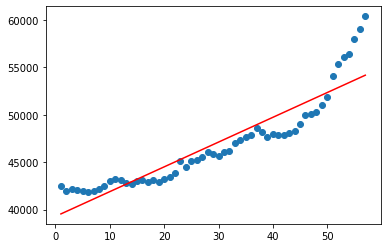

In [5]:
#linear regress
slope, intercept, r_value, p_value, std_err = stats.linregress(data.month, data.price)

#printing slope, intercept and error square
print("{}x+{}".format(slope,intercept))
print(r_value**2)

#linear function
def predict(x):  
  return slope * x + intercept

#ploting
fitLine = predict(data.month)

plt.scatter(data.month, data.price)  
plt.plot(data.month, fitLine, c='r')  
plt.show()

0.9853941608357161


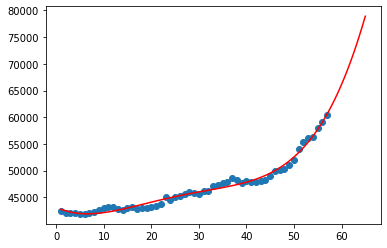

In [6]:
#polinomic 4 grade
p4 = np.poly1d(np.polyfit(data.month, data.price, 4))

#getting and printing the error square
r2 = r2_score(data.price, p4(data.month))
print(r2)

#ploting
xp = np.linspace(1, 65, 100)  
plt.scatter(data.month, data.price)  
plt.plot(xp, p4(xp), c='r')  
plt.show()

           6           5          4         3         2
-1.62e-05 x + 0.00315 x - 0.2219 x + 7.048 x - 97.08 x + 566.9 x + 4.129e+04
0.9891402103968835


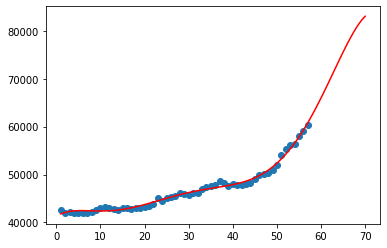

In [7]:
#polinomic 6 grade
p6 = np.poly1d(np.polyfit(data.month, data.price, 6))
print(p6)

#getting and printing the error square
r2 = r2_score(data.price, p6(data.month))
print(r2)

#ploting
xp = np.linspace(1, 70, 100)  
plt.scatter(data.month, data.price)  
plt.plot(xp, p6(xp), c='r')  
plt.show()

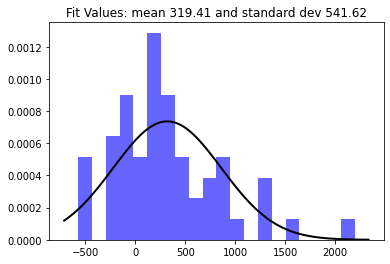

In [8]:
mean = np.mean(data.diff_price)
std_dev = np.std(data.diff_price)


plt.hist(data.diff_price, bins=20, density=True, alpha=0.6, color='b')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean, std_dev)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit Values: mean {:.2f} and standard dev {:.2f}".format(mean, std_dev)
plt.title(title)
plt.show()

In [9]:
mean = np.mean(data.price)
std_dev = np.std(data.price, ddof=1)

print(mean)
print(std_dev)

fig = px.histogram(data, x="price", nbins=15)
fig.show()

46853.80701754386
4736.994015341211
